## Feature Engineering

Imports:

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

Leer los datos del dataset

In [107]:
df = pd.read_csv('../data/processed/Airbnb_Data_processed.csv')
print(f'\nColumnas:\n{df.columns}')


Columnas:
Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds'],
      dtype='object')


## Variables derivadas

Total Amenities:

In [108]:
df['total_amenities'] = df['amenities'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Eliminamos la columna original
df.drop(columns=['amenities'], inplace=True)

Amenities por guest:

In [109]:
df['amenities_per_guest'] = df['total_amenities'] / (df['accommodates'] + 1e-5)

Baños por bedroom:

In [110]:
df['bathrooms_per_bedroom'] = df.apply(lambda row: row['bathrooms'] / row['bedrooms'] if row['bedrooms'] > 0 else row['bathrooms'], axis=1)

Camas por room:

In [111]:
df['beds_per_bedroom'] = df.apply(lambda row: row['beds'] / row['bedrooms'] if row['bedrooms'] > 0 else row['beds'], axis=1)

Capacidad por room:

In [112]:
df['accommodates_per_bedroom'] = df.apply(lambda row: row['accommodates'] / row['bedrooms'] if row['bedrooms'] > 0 else row['accommodates'], axis=1)

## Visualizacion de nuevas variables:

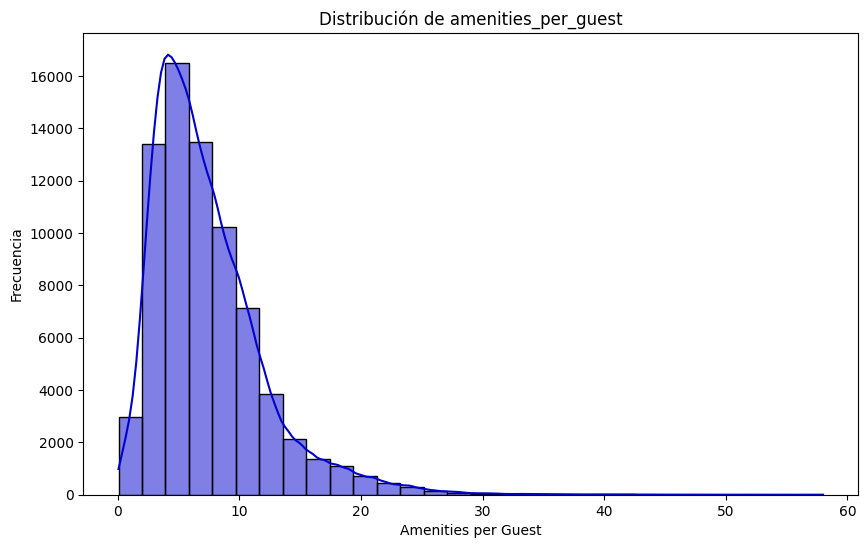

In [113]:
plt.figure(figsize=(10,6))
sns.histplot(df['amenities_per_guest'], bins=30, kde=True, color='mediumblue')
plt.title("Distribución de amenities_per_guest")
plt.xlabel("Amenities per Guest")
plt.ylabel("Frecuencia")
plt.show()

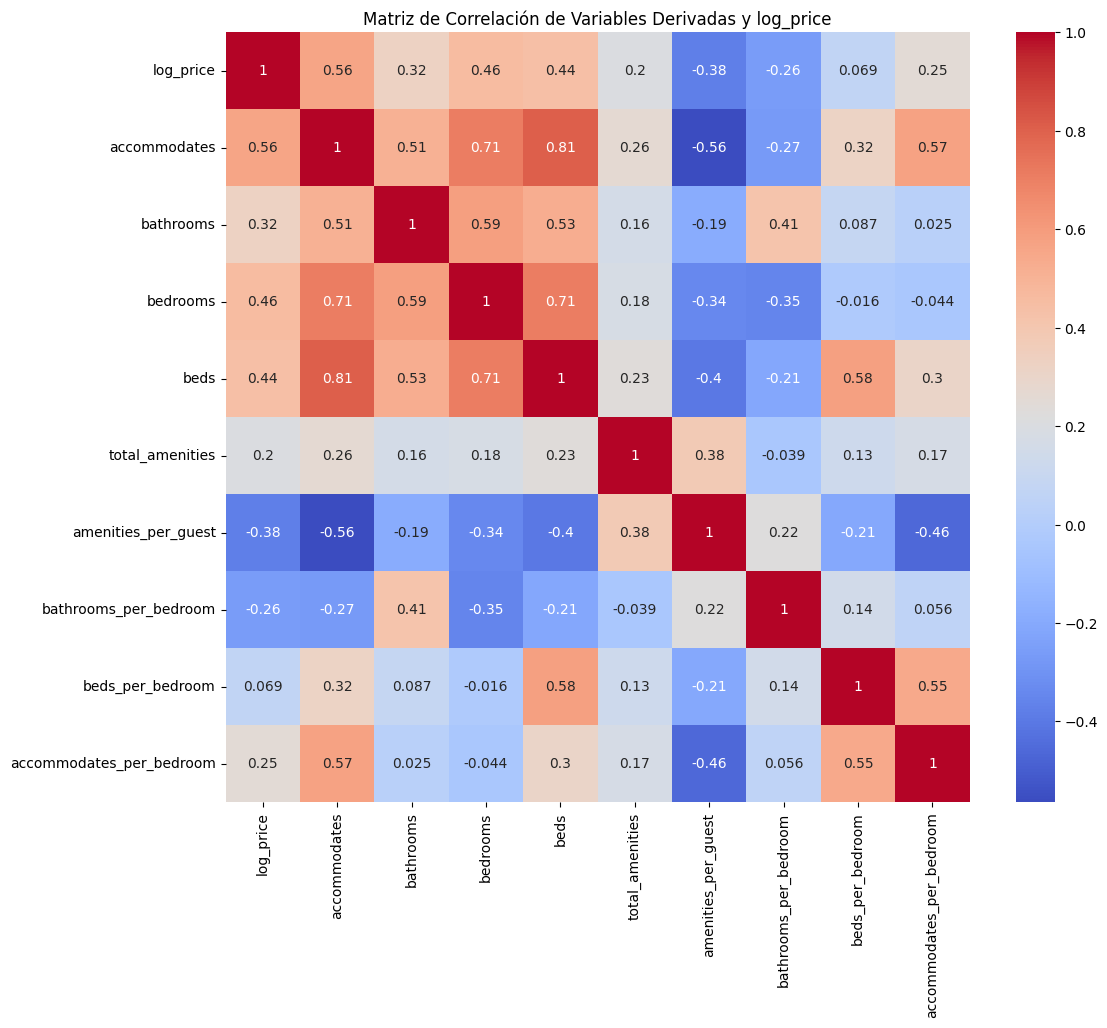

In [114]:
features_to_plot = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                    'total_amenities', 'amenities_per_guest', 'bathrooms_per_bedroom', 
                    'beds_per_bedroom', 'accommodates_per_bedroom']
plt.figure(figsize=(12,10))
sns.heatmap(df[features_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Variables Derivadas y log_price")
plt.show()

## Codificacion para variables booleanas

Booleanos:

In [115]:
if df['cleaning_fee'].dtype == 'bool':
    df['cleaning_fee'] = df['cleaning_fee'].astype(int)
    
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0, -1: -1}).fillna(0)

# Si 'host_has_profile_pic' y 'host_identity_verified' eran -1 o 't'/'f', convertir a 0/1
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0, -1: -1}).fillna(-1)
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0, -1: -1}).fillna(-1)

In [116]:
df['instant_bookable'].unique()
df['host_has_profile_pic'].unique()
df['host_identity_verified'].unique()

array([ 1.,  0., -1.])

In [117]:
print(f'\nColumnas:\n{df.columns}')


Columnas:
Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'total_amenities', 'amenities_per_guest',
       'bathrooms_per_bedroom', 'beds_per_bedroom',
       'accommodates_per_bedroom'],
      dtype='object')


In [118]:
#df['property_type'].unique()
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30',
       'super_strict_60'], dtype=object)

## Codificacion para variables categoricas

One-Hot Encoding:

In [119]:
# Definir las columnas a One-Hot
one_hot_cols = ['room_type', 'bed_type', 'cancellation_policy']

# Crear e implementar el OneHotEncoder
encoder = ce.OneHotEncoder(cols=one_hot_cols, use_cat_names=True)
df = encoder.fit_transform(df)

print("Columnas tras One-Hot Encoding:")
print(df.columns.tolist())

Columnas tras One-Hot Encoding:
['log_price', 'property_type', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'accommodates', 'bathrooms', 'bed_type_Real Bed', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Couch', 'bed_type_Airbed', 'cancellation_policy_strict', 'cancellation_policy_moderate', 'cancellation_policy_flexible', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'total_amenities', 'amenities_per_guest', 'bathrooms_per_bedroom', 'beds_per_bedroom', 'accommodates_per_bedroom']


Frecuency ecoding:

In [120]:
# Frequency encoding for property_type (39 categories)
property_type_freq = df['property_type'].value_counts() / len(df)
df['property_type_freq'] = df['property_type'].map(property_type_freq)

# Frequency encoding for zipcode (many categories)
zipcode_freq = df['zipcode'].value_counts() / len(df)
df['zipcode_freq'] = df['zipcode'].map(zipcode_freq)

df.drop(columns=['property_type', 'zipcode'], inplace=True)

Nulos:

In [121]:
print(f'\nNulos:\n{df.isnull().sum()}')


Nulos:
log_price                              0
room_type_Entire home/apt              0
room_type_Private room                 0
room_type_Shared room                  0
accommodates                           0
bathrooms                              0
bed_type_Real Bed                      0
bed_type_Futon                         0
bed_type_Pull-out Sofa                 0
bed_type_Couch                         0
bed_type_Airbed                        0
cancellation_policy_strict             0
cancellation_policy_moderate           0
cancellation_policy_flexible           0
cancellation_policy_super_strict_30    0
cancellation_policy_super_strict_60    0
cleaning_fee                           0
host_has_profile_pic                   0
host_identity_verified                 0
instant_bookable                       0
number_of_reviews                      0
review_scores_rating                   0
bedrooms                               0
beds                                   0
total_am

In [122]:
print(f'\nTipos:\n{df.dtypes}')


Tipos:
log_price                              float64
room_type_Entire home/apt                int64
room_type_Private room                   int64
room_type_Shared room                    int64
accommodates                             int64
bathrooms                              float64
bed_type_Real Bed                        int64
bed_type_Futon                           int64
bed_type_Pull-out Sofa                   int64
bed_type_Couch                           int64
bed_type_Airbed                          int64
cancellation_policy_strict               int64
cancellation_policy_moderate             int64
cancellation_policy_flexible             int64
cancellation_policy_super_strict_30      int64
cancellation_policy_super_strict_60      int64
cleaning_fee                             int32
host_has_profile_pic                   float64
host_identity_verified                 float64
instant_bookable                         int64
number_of_reviews                        int64
revie

In [123]:
if os.path.exists("../data/processed/Airbnb_Data_encoded.csv"):
  print("Eliminando archivo anterior...")
  os.remove("../data/processed/Airbnb_Data_encoded.csv")
  
df.to_csv('../data/processed/Airbnb_Data_encoded.csv', index=False)
print("Datos procesados guardados en Airbnb_Data_encoded.csv")

Datos procesados guardados en Airbnb_Data_encoded.csv
